In [4]:
import function as fn
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from operator import itemgetter

In [5]:
# general settings for charts
font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}
matplotlib.rc('font', **font)

main_color = '#0000b3'
main_color2 = '#b30000'
secondary_color = '#b3b3ff'

# In this file a single network is analysed. The options are:
# * mathoverflow_{a2q, c2q, c2a}
# * superuser_{a2q, c2q, c2a}
# * askubuntu_{a2q, c2q, c2a}


In [6]:
dataset_options = {
    1: 'data/mathoverflow/sx-mathoverflow-a2q.txt',
    2: 'data/mathoverflow/sx-mathoverflow-c2q.txt',
    3: 'data/mathoverflow/sx-mathoverflow-c2a.txt',
    4: 'data/askubuntu/sx-askubuntu-a2q.txt',
    5: 'data/askubuntu/sx-askubuntu-c2q.txt',
    6: 'data/askubuntu/sx-askubuntu-c2a.txt',
    7: 'data/superuser/sx-superuser-a2q.txt',
    8: 'data/superuser/sx-superuser-c2q.txt',
    9: 'data/superuser/sx-superuser-c2a.txt'
}

### CREATE GRAPHS

In [4]:
# names = ['a2q', 'c2q', 'c2a']
# for i in range(4,7):
#     nodes, edges_per_t = fn.read_graph_from_file(dataset_options[i])
#     G = fn.generate_weighted_aggregated_graph(nodes, edges_per_t)
#     nx.write_gpickle(G, 'pickles/graphs/askubuntu/{}.gpickle'.format(names[i-4])) # This so we dont have to compute it everytime

In [93]:
# names = ['a2q', 'c2q', 'c2a']
# for i in range(7,10):
#     nodes, edges_per_t = fn.read_graph_from_file(dataset_options[i])
#     G = fn.generate_weighted_aggregated_graph(nodes, edges_per_t)
#     nx.write_gpickle(G, 'pickles/graphs/superuser/{}.gpickle'.format(names[i-7])) # This so we dont have to compute it everytime

### CREATE PLOTS FOR COMMON NODES PER LAYER

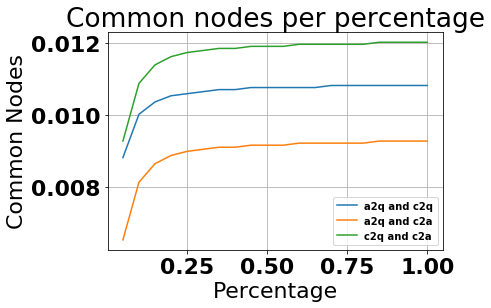

In [16]:
make_plot("mathoverflow")

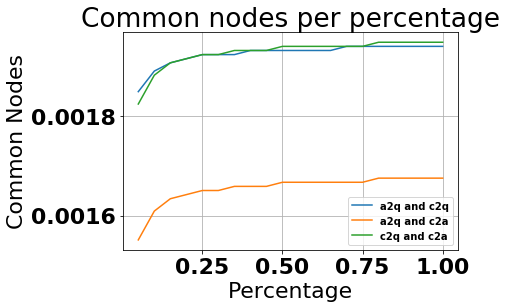

In [15]:
make_plot("superuser")

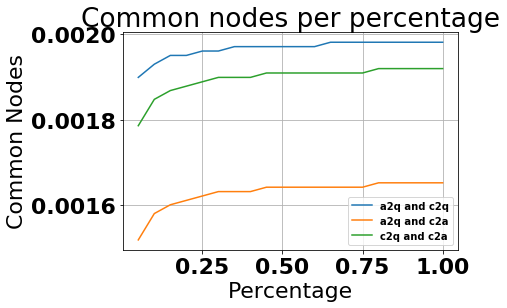

In [14]:
make_plot("askubuntu")

### USEFUL FUNCTIONS

In [ ]:
def make_plot(t):
    names = ['a2q', 'c2q', 'c2a']
    G_degrees = [[],[],[]]
    for j in range(1,4):
        G_degrees[j-1] = []
        G = nx.read_gpickle('pickles/graphs/{0}/{1}.gpickle'.format(t, names[j-1]))
        for i, v in G.out_degree(weight='weight'):
            G_degrees[j-1].append([i,v])
        G_degrees[j-1].sort(key=itemgetter(1), reverse=True)
    
    names = ['a2q', 'c2q', 'c2a']
    y1 = []
    y2 = []
    y3 = []
    percentages = list(np.arange(0.05, 1.05, 0.05))
#     length = G.number_of_nodes()
    length = sum([len(i) for i in G_degrees]) / 3

    for percentage in percentages:
        percentage = round(percentage, 2)
        top =[[], [], []]
        for ind,layer in enumerate(G_degrees):
    #         print(int(np.floor(percentage*len(layer))))
            top[ind] = layer[:int(np.floor(percentage*len(layer)))]

        for ind, layer in enumerate(top):
            top[ind] = [node[1] for node in layer]
        
        a2q = set(top[0])
        c2q = set(top[1])
        c2a = set(top[2])
        
#         print(str(percentage))
        # compute common users in a2q and c2q
        result = a2q
        result.intersection_update(c2q)
        y1 += [len(result)/ length]
#         print('Top {0} of a2q and c2q have {1} common nodes'.format(str(percentage), len(result)))

        # compute common users in a2q and c2a
        result = a2q
        result.intersection_update(c2a)
        y2 += [len(result)/ length]
#         print('Top {0} of a2q and c2a have {1} common nodes'.format(str(percentage), len(result)))

        # compute common users in c2q and c2a
        result = c2q
        result.intersection_update(c2a)
        y3 += [len(result)/ length]
#         print('Top {0} of c2q and c2a have {1} common nodes'.format(str(percentage), len(result)))

    x = list(map(lambda x: round(x,2), percentages))

    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.plot(x, y3)
    plt.xlabel('Percentage')
    plt.ylabel('Common Nodes')
    plt.title('Common nodes per percentage')
    # plt.xlim((0, max_degree))
    plt.grid(True)
    plt.legend(['a2q and c2q', 'a2q and c2a', 'c2q and c2a'], loc='best', prop={'size': 10})

    plt.show()